In [1]:
import pandas as pd

**Se carga el archivo en memoria**

In [2]:
titanic_df = pd.read_csv('train.csv')

**Visualizamos el contenido del los datos**

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Observe con atención la información. Por ejemplo, en el primer renglón tenemos 891 pasajeros.
Vea que en el renglón 11 (numerado con 10) Cabin solo tenemos 204 datos, los demás son NaN

Respondamos las preguntas, comenzando con ¿qué deseamos realizar con este *dataset*?

¿Qué factores los ayudaron a algunos pasajeros a sobrevivir al hundimiento?

Comencemos haciendo un análisis exploratorio

1. ¿Quiénes eran los pasajeros del titanic?

In [5]:
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
sns.set_theme(style="darkgrid")

Podemos graficar primero por sexo

<AxesSubplot:xlabel='Sex', ylabel='count'>

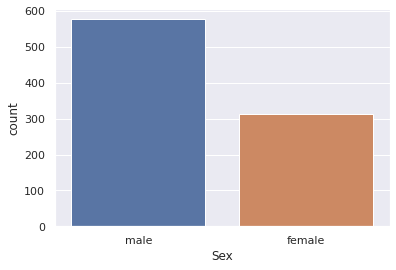

In [6]:
sns.countplot(x='Sex', data=titanic_df)

Ahora vamos a graficar por clase

<AxesSubplot:xlabel='Sex', ylabel='count'>

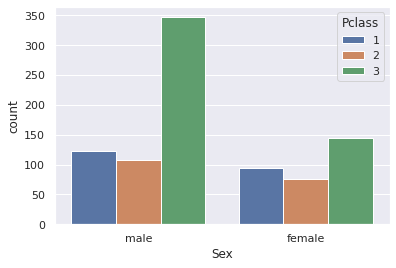

In [7]:
sns.countplot(x='Sex', data=titanic_df, hue='Pclass')

Para comparar entre hombres y mujeres de las diferentes clases, vamos a invertir la gráfica:

<AxesSubplot:xlabel='Pclass', ylabel='count'>

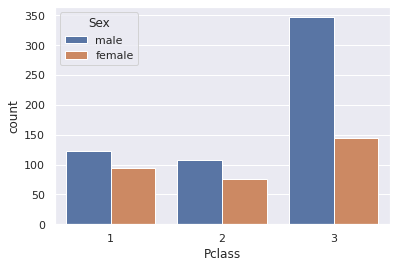

In [8]:
sns.countplot(x='Pclass', data=titanic_df, hue='Sex')

Recordemos que, cuando hay un desalojo de un sitio que se encuentra bajo un desastre, siempre se le da prioridad a las mujeres y los niños, por tanto sería conveniente ver comparar hombres, mujeres y niños. Para ello necesitamos conocer la edad del pasajero. Esto lo podemos realizar creando la siguiente función:

In [9]:
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

Ahora, necesitamos aplicar esta función a cada uno de los pasajeros para obtener el número de hombres, mujeres y niños. Para ello crearemos una nueva columna en nuestro dataframe con la información necesaria:

In [10]:
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)

In [11]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


Realicemos nuestra gráfica de barras nuevamente

<AxesSubplot:xlabel='Pclass', ylabel='count'>

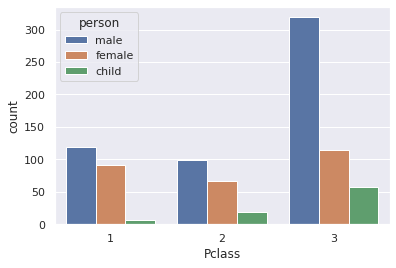

In [12]:
sns.countplot(x='Pclass', data=titanic_df, hue='person')

Qué podemos decir de esta gráfica? Espera que hubiera más niños en tercera clase que en primera?

Hagamos un histograma sobre las edades de los pasajeros:

<AxesSubplot:>

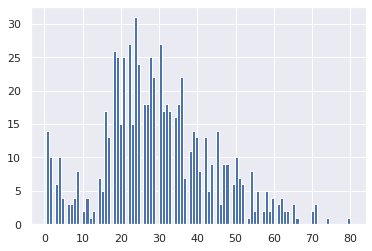

In [13]:
titanic_df['Age'].hist(bins=100, )

Se observa que hay mas niños muy pequeños de 1-2 años, luego baja conforme aumenta la edad y después sube abruptamente. ¿Cuál es la media de edades?

In [14]:
titanic_df['Age'].mean()

29.69911764705882

Podemos ahora comparar el número de mujeres, hombres y niños:

In [15]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

## Múltiples gráficas en una figura

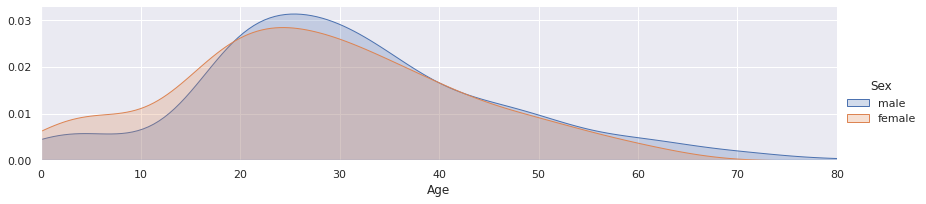

In [16]:
fig = sns.FacetGrid(titanic_df, hue = 'Sex', aspect = 4)

fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

Ahora deseo también incluir los niños, para ello solo tengo que modificar 'Sex' por 'person' en el parámetro hue de FacetGrid:

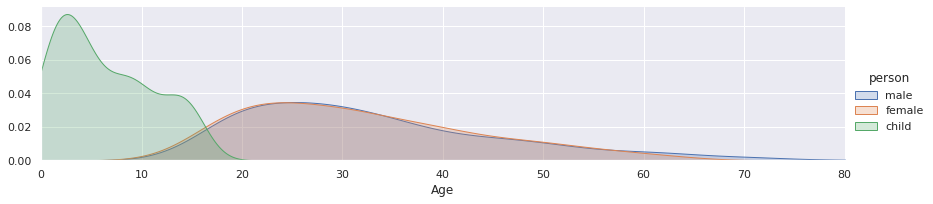

In [17]:
fig = sns.FacetGrid(titanic_df, hue = 'person', aspect = 4)

fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

Y lo queremos hacer por clases?

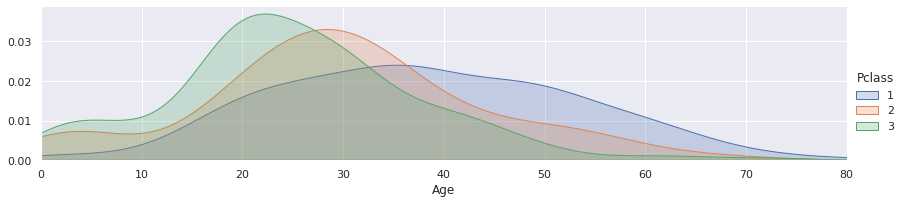

In [18]:
fig = sns.FacetGrid(titanic_df, hue = 'Pclass', aspect = 4)

fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

Ahora quiero ver en que cubierta estaban los pasajeros y como se relaciona eso con su clase

In [19]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


Observamos que tenemos una columna llamada 'Cabin', pero vea que hay muchos datos nulos. Lo pirmero que debemos realizar es eliminar esos NaN.


In [20]:
deck = titanic_df['Cabin'].dropna()

In [21]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

Observamos que ya no tenemos los NaN. Adicionalmente, la informacion que nos da la primera letra es la Cubierta en la que estaba cada pasajero, es decir A, B, C, D, E, F, G eso nos da la clase. El número no lo necesitamos para este análisis. Lo que vamos a realizar es eliminar el número que sigue a la letra

<AxesSubplot:xlabel='Cabin', ylabel='count'>

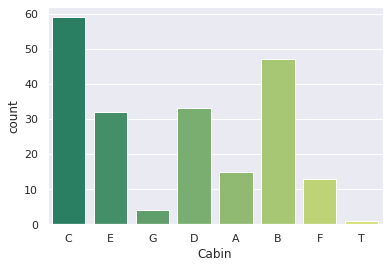

In [22]:
levels = []

for level in deck:
    levels.append(level[0])

cabin_df = pd.DataFrame(levels)
cabin_df.columns = ['Cabin']

sns.countplot(x='Cabin', data=cabin_df, palette='summer')

Observe un valor extraño: clase T. En realidad no tiene sentido, debemos eliminar ese dato:

<AxesSubplot:xlabel='Cabin', ylabel='count'>

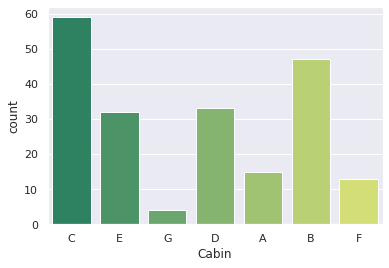

In [23]:
cabin_df = cabin_df[cabin_df != 'T']
sns.countplot(x='Cabin', data=cabin_df, palette='summer')

<AxesSubplot:xlabel='count', ylabel='Cabin'>

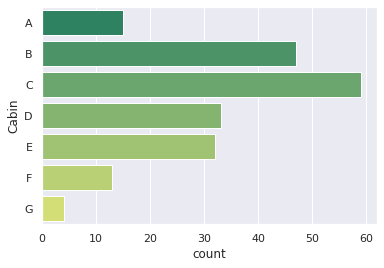

In [24]:
cabin_df_sorted = cabin_df.sort_values(by = ['Cabin'])

cabin_df_sorted
sns.countplot(y='Cabin', data=cabin_df_sorted, palette='summer')

<AxesSubplot:xlabel='count', ylabel='Cabin'>

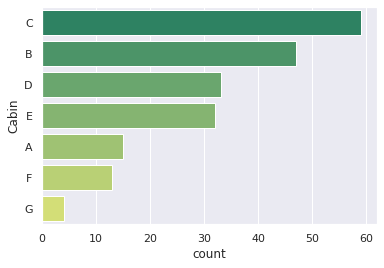

In [25]:
sns.countplot(y='Cabin', data=cabin_df, palette='summer', order=['C','B','D','E','A','F','G'])

DE donde provienen los pasajeros?

<AxesSubplot:xlabel='Embarked', ylabel='count'>

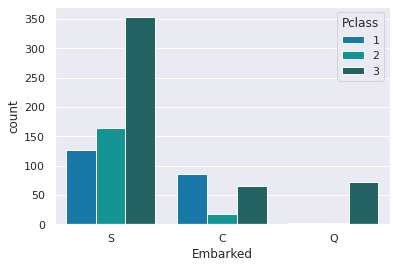

In [26]:
sns.countplot(x='Embarked', data=titanic_df, hue='Pclass', palette='winter_d')

Observe que todos los que abordaron en Q lo hicieron en tercera clase

Quienes de los pasajeros van solos y cuales van acompañados (con familia)?

Para ello vamos a fijarnos en las columnas SibSp y Parch (cuando ambos son ceros, la persona va completamente sola)

In [27]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


Agregamos una nueva columa:

In [28]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [29]:
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

Todas los renglones cero indican personas completamente solas.

In [30]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

/home/luiggi/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [31]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


<AxesSubplot:xlabel='Alone', ylabel='count'>

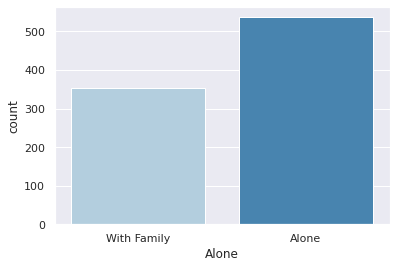

In [32]:
sns.countplot(x='Alone', data=titanic_df, palette='Blues')

Finalmente vamos a ver quien sobrevivió. Vamos a agregar una nueva columna.

In [33]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no', 1:'yes'})

In [34]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


<AxesSubplot:xlabel='Survivor', ylabel='count'>

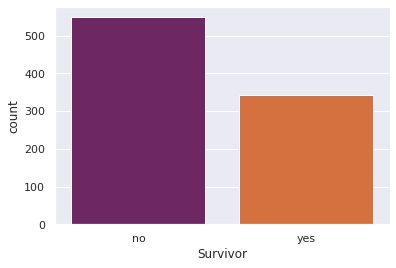

In [35]:
sns.countplot(x='Survivor', data=titanic_df, palette='inferno')

Qué factores influyeron en la sobreviviencia?

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

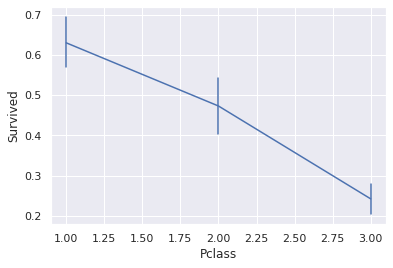

In [36]:
sns.lineplot(x="Pclass", y="Survived", data=titanic_df, err_style="bars",)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

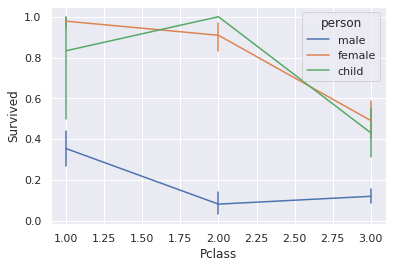

In [37]:
sns.lineplot(x="Pclass", y="Survived", hue='person',data=titanic_df, err_style="bars",)

Como impacta la edad en la sobrevivencia?

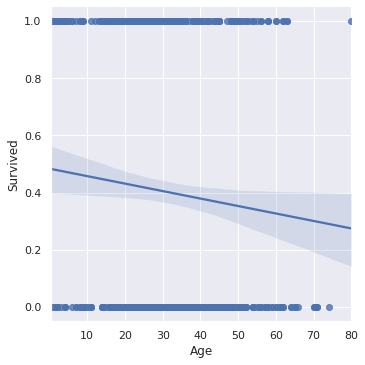

In [46]:
sns.lmplot(x='Age', y='Survived', data=titanic_df)

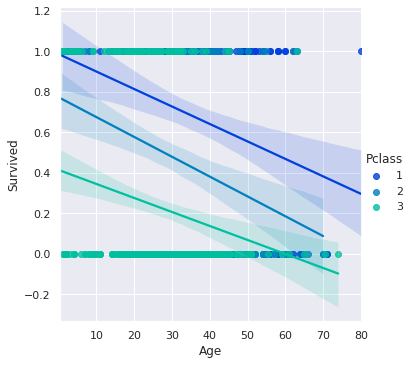

In [45]:
sns.lmplot(x='Age', y='Survived', hue='Pclass', data=titanic_df, palette='winter')

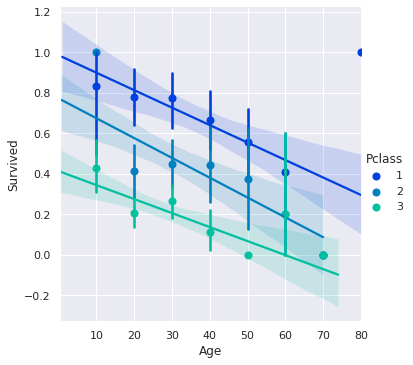

In [44]:
generations = [10,20,30,40,50,60,70,80]

sns.lmplot(x='Age', y='Survived', hue='Pclass', data=titanic_df, palette='winter', x_bins=generations)

Como la edad y el sexo se relacionan con la sobrevivencia?

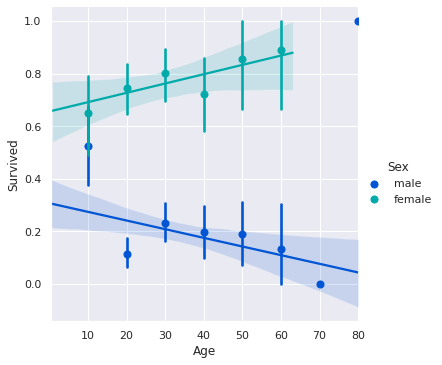

In [43]:
sns.lmplot(x='Age', y='Survived', hue='Sex', data=titanic_df, palette='winter', x_bins=generations)

1. La cabina tiene un efecto en la sobrevivencia? Esto hace sentido con tu intuición?
2. Tener una familia incrementa la posibilidad de sobrevivir?

In [48]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


ValueError: could not convert string to float: 'C85'

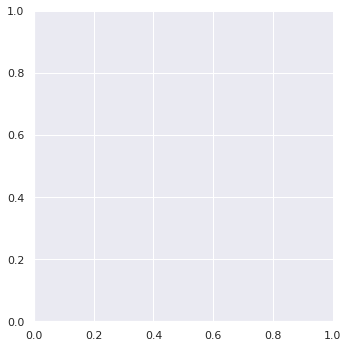

In [47]:
sns.lmplot(x='Cabin', y='Survived', hue='Sex', data=titanic_df, palette='winter', x_bins=generations)